In [97]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")


import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import levene

sns.set_style("whitegrid")

sns.set_theme(style="whitegrid")

plt.style.use('Solarize_Light2')

# Fase 1: Exploración y Limpieza

1. Exploración Inicial:

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

In [98]:
df_1 = pd.read_csv("CustomerFlightActivity.csv", index_col = 0) 
df_1.sample(8) #Abrimos el 1º dataframe para ver lo que contiene

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
276035,2018,2,7,0,7,931,100.44,0,0
248265,2018,10,13,0,13,2028,202.00,0,0
198645,2018,7,3,3,6,3408,340.00,0,0
210746,2018,8,0,0,0,0,0.00,0,0
622324,2017,9,13,0,13,949,94.00,0,0
287023,2018,9,13,0,13,1274,127.00,0,0
182531,2017,5,0,0,0,0,0.00,0,0
994308,2018,2,9,0,9,1539,165.24,0,0


In [99]:
df_2 = pd.read_csv("CustomerLoyaltyHistory.csv", index_col = 0)
df_2.sample(8) #Abrimos el 2º dataframe para ver lo que contiene

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
624980,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,57150.0,Single,Nova,6369.26,Standard,2015,11,NaN,NaN
481105,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,82839.0,Married,Star,2797.67,Standard,2014,5,NaN,NaN
525202,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,47802.0,Single,Star,7894.50,Standard,2018,11,NaN,NaN
867780,Canada,Quebec,Quebec City,G1B 3L5,Female,Master,128118.0,Married,Star,3873.65,Standard,2013,2,NaN,NaN
209787,Canada,Ontario,Toronto,P2T 6G3,Male,College,NaN,Single,Nova,15814.75,Standard,2012,6,NaN,NaN
434470,Canada,Ontario,Ottawa,K1F 2R2,Male,College,NaN,Married,Star,8002.31,Standard,2012,10,NaN,NaN
947863,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,66226.0,Married,Star,2580.85,Standard,2016,8,NaN,NaN
210339,Canada,Ontario,Toronto,P1W 1K4,Female,College,NaN,Single,Nova,5775.52,Standard,2014,11,NaN,NaN


In [100]:
df_1 = df_1.reset_index() #Reseteamos los indices de df 1
df_1

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [101]:
df_2 = df_2.reset_index() #Reseteamos los indices de df 1
df_2

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [102]:
df_1.info() #Información del 1º df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [103]:
df_2.info() #Información del 2º df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [104]:
df_1.shape[0] #Filas

405624

In [105]:
df_1.shape[1] #columnas

10

In [106]:
df_2.shape[0]

16737

In [107]:
df_2.shape[1]

16

In [108]:
df_nulos_1 = pd.DataFrame((df_1.isnull().sum() / df_1.shape[0]) * 100, columns = ["%_nulos"])
df_nulos_1[df_nulos_1["%_nulos"] > 0] # filtramos el df 1 para quedarnos solo con aquellas columnas que tengan nulos

,%_nulos


In [109]:
df_nulos_2 = pd.DataFrame((df_2.isnull().sum() / df_2.shape[0]) * 100, columns = ["%_nulos"])
df_nulos_2[df_nulos_2["%_nulos"] > 0] # filtramos el df 2 para quedarnos solo con aquellas columnas que tengan nulos

,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


In [110]:
df_1.duplicated().sum() #Observamos las filas duplicadas df 1

1864

In [111]:
df_1 = df_1.drop_duplicates() #Filas eliminadas df 1
print("Cantidad de filas después de eliminar duplicados:", len(df_1))

Cantidad de filas después de eliminar duplicados: 403760


In [112]:
df_1.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [113]:
df_1["Loyalty Number"].duplicated().sum() #Observamos que en esta columna del df 1 hay muchos duplicados

387023

In [114]:
df_2.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [115]:
unicos_1 = df_1.nunique()
unicos_1

Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

In [116]:
unicos_2 = df_2.nunique()
unicos_2

Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

In [117]:
df_2.duplicated().sum() #No hay filas duplicadas en df 2

0

In [118]:
df_1.describe(include = "all") #Observamos la estadistica basica de df 1

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000
mean,549875.383713,2017.500352,6.501335,4.134050,1.036569,5.170619,1214.460979,124.263761,30.838587,2.495973
std,258961.514684,0.500000,3.451982,5.230064,2.080472,6.526858,1434.098521,146.696179,125.758002,10.172033
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326699.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550598.000000,2018.000000,7.000000,1.000000,0.000000,1.000000,525.000000,53.000000,0.000000,0.000000
75%,772152.000000,2018.000000,10.000000,8.000000,1.000000,10.000000,2342.000000,240.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [119]:
df_2.describe(include = "all") #Observamos la estadistica basica de df 2

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,16737,16737,16737,16737,16737,16737,12499.000000,16737,16737,16737.000000,16737,16737.000000,16737.000000,2067.000000,2067.000000
unique,NaN,1,11,29,55,2,5,NaN,3,3,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,NaN,Married,Star,NaN,Standard,NaN,NaN,NaN,NaN
freq,NaN,16737,5404,3351,911,8410,10475,NaN,9735,7637,NaN,15766,NaN,NaN,NaN,NaN
mean,549735.880445,NaN,NaN,NaN,NaN,NaN,NaN,79245.609409,NaN,NaN,7988.896536,NaN,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,NaN,NaN,NaN,NaN,NaN,NaN,35008.297285,NaN,NaN,6860.982280,NaN,1.979111,3.398958,1.380743,3.455297
min,100018.000000,NaN,NaN,NaN,NaN,NaN,NaN,-58486.000000,NaN,NaN,1898.010000,NaN,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,NaN,NaN,NaN,NaN,NaN,NaN,59246.500000,NaN,NaN,3980.840000,NaN,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,NaN,NaN,NaN,NaN,NaN,NaN,73455.000000,NaN,NaN,5780.180000,NaN,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,NaN,NaN,NaN,NaN,NaN,NaN,88517.500000,NaN,NaN,8940.580000,NaN,2017.000000,10.000000,2018.000000,10.000000


- Une los dos conjuntos de datos de la forma más eficiente.

In [120]:
df_1.rename(columns={'Loyalty Number': 'LoyaltyNumber'}, inplace=True)
df_1

,LoyaltyNumber,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [121]:
df = df_1.merge(df_2, left_on = "LoyaltyNumber", right_on = "Loyalty Number")
df.sample(5)

,LoyaltyNumber,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
172623,519276,2017,1,0,0,0,0,0.0,0,0,519276,Canada,British Columbia,Vancouver,V6E 3Z3,Female,High School or Below,80501.0,Single,Nova,6300.44,Standard,2016,7,NaN,NaN
135766,428919,2018,5,15,0,15,4170,417.0,0,0,428919,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,58209.0,Divorced,Star,4139.90,Standard,2015,7,NaN,NaN
143717,446991,2017,6,0,0,0,0,0.0,0,0,446991,Canada,Quebec,Montreal,H2Y 4R4,Male,Bachelor,87889.0,Married,Star,7933.82,Standard,2015,10,NaN,NaN
396927,777418,2018,1,5,0,5,1700,170.0,0,0,777418,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,77304.0,Married,Nova,5396.31,Standard,2017,12,2018.0,8.0
321763,900501,2018,5,0,0,0,0,0.0,0,0,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoyaltyNumber                403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Loyalty Number               403760 non-null  int64  
 11  Country                      403760 non-null  object 
 12  Province                     403760 non-null  object 
 13 

In [123]:
unicos = df.nunique()
unicos

LoyaltyNumber                  16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Loyalty Number                 16737
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
dtype: int64

In [124]:
df.head(10)

,LoyaltyNumber,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
5,100018,2017,6,4,1,5,4330,433.0,0,0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
6,100018,2017,7,10,0,10,3870,387.0,0,0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
7,100018,2017,9,9,4,13,1651,165.0,0,0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
8,100018,2017,8,10,5,15,4200,420.0,690,56,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
9,100018,2017,10,6,0,6,1032,103.0,0,0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [125]:
df["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2016., 2014., 2013., 2017.])

- 'Loyalty Number' : numero cliente, hay 16737 valores unicos, los demas son duplicados?

- 'Year' : hay 2 años 2017 y 2018

- 'Month' : hay 12 meses

- 'Flights Booked' : vuelvos reservados

- 'Flights with Companions' : vuelos que se han viajado acompañado, pueden ser viajes de empresa o familiar

- 'Total Flights': total vuelos en 1 año

- 'Distance': distancia total recorrida

- 'Points Accumulated': cantidad de puntos acumualdos, lealtad

- 'Points Redeemed' : puntos canjeados

- 'Dollar Cost Points Redeemed' : costo en dólares asociado con los puntos que han sido canjeados o utilizados

- 'Country': pais, Canada

- 'Province' : provincia

- 'City' : ciudad

- 'Postal Code': codigo postal

- 'Gender', : genero, male female

- 'Education' : educacion 5 niveles

- 'Salary' : salario, jujaria que hay algun negativo

- 'Marital Status': 3 tipos, casado, divorciado, soltero

- 'Loyalty Card': tipo de cliente Star', 'Aurora', 'Nova

- 'CLV': 7900 datos, entre 3000(poco valioso) a 6000(muy valioso)  Valor de vida del cliente,  importante para las empresas, ya que les ayuda a comprender la rentabilidad de sus clientes a lo largo del tiempo

- 'Enrollment Type' : hay 2 tipos santandar o promocion 2018,   tipo de inscripción o método utilizado por un individuo para unirse a un programa de lealtad

- 'Enrollment Year' : del 2014 al 2017, año en el que un cliente  se inscribió o se unió al programa de lealtad

- 'Enrollment Month': mes inscrtipcion

- 'Cancellation Year' : del 2018 al 2013 año cancelacion suscripcion 

- 'Cancellation Month': mes cancelacion

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

Anotaciones : Según los datos, no se eliminará ningun atributo nulo, ya que esos nulos significa que no hay dato. En el caso de las columnas "cancellationyear", "cancellationmouth", si son datos nulos significa que el cliente o mienbro sigue pertceciendo a la empresa o asociación. En el caso de "salary" lo más probable es que sea un dato que el cliente puede o no rellenar en su cartilla de mienbro.

In [126]:
nuevas_columnas = {columna:columna.lower() for columna in df} #modificamos las columnas a minúsculas

df.rename(columns = nuevas_columnas, inplace= True) #cambiamos las columnas antiguas por las homogeneizadas en el paso anterior (nuevas_columnas)

df.sample(8)

,loyaltynumber,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
53739,230311,2018,9,0,0,0,0,0.0,0,0,230311,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,54123.0,Married,Star,4781.82,Standard,2014,8,NaN,NaN
380509,247391,2018,7,0,0,0,0,0.0,0,0,247391,Canada,Ontario,Toronto,P1W 1K4,Female,Bachelor,50217.0,Single,Aurora,12734.21,Standard,2017,12,2018.0,8.0
321886,900853,2018,8,0,0,0,0,0.0,0,0,900853,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,59034.0,Married,Star,2542.85,Standard,2014,7,NaN,NaN
34062,183052,2018,6,7,5,12,1824,182.0,0,0,183052,Canada,Ontario,Toronto,P1W 1K4,Female,Bachelor,52929.0,Single,Star,3267.71,Standard,2016,3,NaN,NaN
300285,842379,2018,6,14,0,14,2422,242.0,0,0,842379,Canada,British Columbia,Vancouver,V1E 4R6,Male,College,NaN,Married,Aurora,5182.46,Standard,2018,12,NaN,NaN
234652,676289,2017,3,0,0,0,0,0.0,0,0,676289,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,69274.0,Single,Star,5780.18,Standard,2016,5,NaN,NaN
13079,131673,2018,10,1,1,2,1744,174.0,0,0,131673,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,65885.0,Married,Nova,3245.33,Standard,2016,12,NaN,NaN
283790,799064,2018,10,0,0,0,0,0.0,0,0,799064,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,49982.0,Married,Star,5379.48,Standard,2018,8,NaN,NaN


In [127]:
df.tail(5)

,loyaltynumber,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
403755,999891,2018,8,0,0,0,0,0.0,0,0,999891,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
403756,999891,2018,9,0,0,0,0,0.0,0,0,999891,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
403757,999891,2018,10,0,0,0,0,0.0,0,0,999891,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
403758,999891,2018,11,0,0,0,0,0.0,0,0,999891,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
403759,999891,2018,12,0,0,0,0,0.0,0,0,999891,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0


In [128]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loyaltynumber,403760.0,NaN,NaN,NaN,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
year,403760.0,NaN,NaN,NaN,2017.500352,0.5,2017.0,2017.0,2018.0,2018.0,2018.0
month,403760.0,NaN,NaN,NaN,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
flights booked,403760.0,NaN,NaN,NaN,4.13405,5.230064,0.0,0.0,1.0,8.0,21.0
flights with companions,403760.0,NaN,NaN,NaN,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
total flights,403760.0,NaN,NaN,NaN,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
distance,403760.0,NaN,NaN,NaN,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
points accumulated,403760.0,NaN,NaN,NaN,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
points redeemed,403760.0,NaN,NaN,NaN,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
dollar cost points redeemed,403760.0,NaN,NaN,NaN,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


2. Limpieza de Datos

In [129]:
df.drop("loyalty number", axis=1, inplace=True) #Eliminamos la columna repetida

In [130]:
df.rename(columns=lambda x: x.strip().replace(" ", ""), inplace = True) #elimnamos los espacios en los nombres de las columnas


In [131]:
df['salary'].describe()

count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64

In [132]:
df['salary'] = df['salary'].apply(lambda x: abs(x) if x < 0 else x)
#ponemos el valor absoluto de los numeros negativos

In [133]:
df['salary'].describe()

count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64

Los datos ya estan listos para garantizar el analisis estadistico

# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

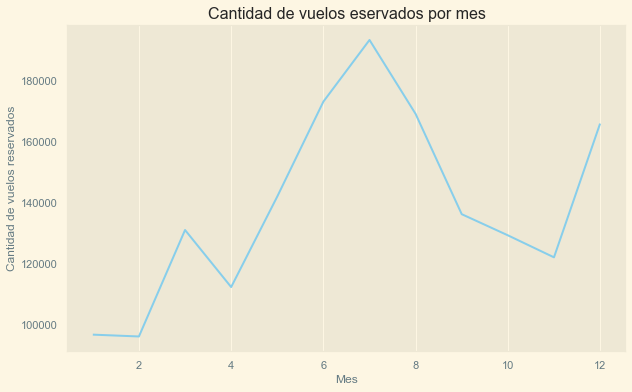

In [134]:
reservas_por_mes = df.groupby('month')['flightsbooked'].sum()

plt.figure(figsize = (10, 6))
reservas_por_mes.plot(kind = 'line', 
                      color = 'skyblue')
plt.title('Cantidad de vuelos eservados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.xticks(rotation = 0)  
plt.grid(axis = 'y');

Del método matplotlib, se ha usado este tipo de gráfico lineal para poder mejor la diferencia entre los datos, representa los datos del mes (categórico) con los vuelvos reservados (numericos) sumandolos por mes. También se puede hacer con barplot, pero ese puso kind = 'line' para que sea linea, si no seria 'bar'. 

Para sacar la informacion se ha agrupado con un 'groupby' en un dataframe los vuelos reservados 'flightsbooked' en los 12 meses del año con la columna 'mouth'. En el gráfico se ha insertado directamente el dataframe agrupado. Tiene un tamaño de 10x6, color azul claro. xtricks indica que las etiquetas del eje x no se rotarán, grid se utiliza para agregar líneas de cuadrícula al gráfico en el eje y.

Con este gráfico vemos que hay mas cantidad de vuelos en verano en julio, seguido de diciembre en navidad, donde menos en el mes de febrero.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

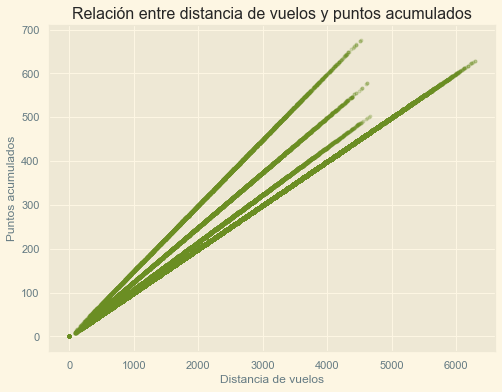

In [135]:
plt.figure(figsize=(8, 6))
plt.scatter(x = 'distance',
            y ='pointsaccumulated', 
            data = df, 
            marker = '.',
            color = 'olivedrab', 
            alpha = 0.2)
plt.title('Relación entre distancia de vuelos y puntos acumulados')
plt.xlabel('Distancia de vuelos')
plt.ylabel('Puntos acumulados')
plt.grid(True);


Del método matplotlib, se ha usado scatter entre la variable x 'distance' (distancia recorrida en km ), numérica, e y 'pointsaccumulated' (puntos acumulados) numerica, data = df es el dataframe donde recogemos la información, marker como puntos, color oliva y alpha es la tranparencia de los puntos. Con tamaño 10x6.

En el gráfico podemos apreciar que a cuanta más distancia más puntos acumulados

3. ¿Cuál es la distribución de los clientes por provincia o estado?

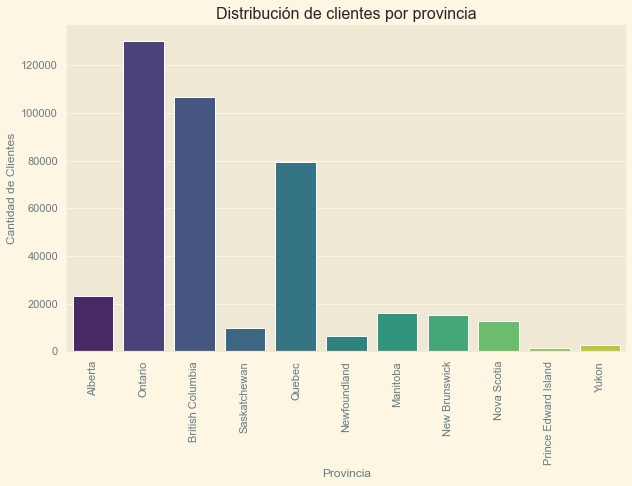

In [136]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'province', 
              data = df, 
              palette = 'viridis')
plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation = 90);  


Del método seaborn, se ha usado un countplot, para variable catégoricas, que es este caso e 'province', y la paleta viridis. Con tamaño 10x6 y los xticks a 90 grados

Viendo los datos de población de las 10 provincias de Candá, coinciden con la cantidad de vlientes de la empresa. Las provincias de Ontario, Quebec y Columbia Británica tienen más poblacion, y por ello más clientes, en cambio, Isla de Principe Edward, Yukon y Newfoundland tienen menos población por lo que tienen menos clientes.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [137]:
df['education'].value_counts()

Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: education, dtype: int64

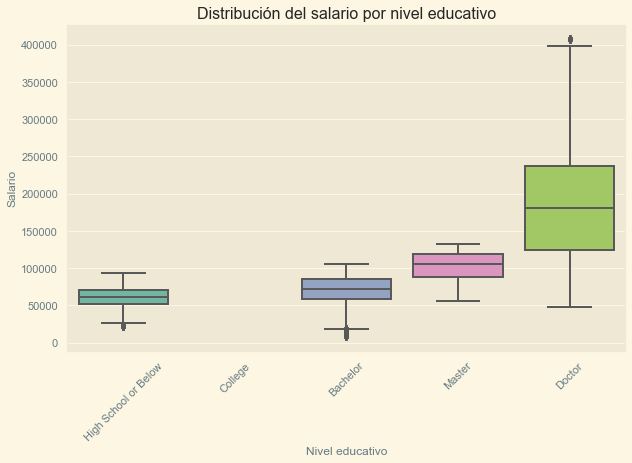

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(x ='education', 
            y ='salary', 
            data = df, 
            order = ['High School or Below','College', 'Bachelor', 'Master' , 'Doctor'], 
            palette = 'Set2')
plt.title('Distribución del salario por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario')
plt.xticks(rotation = 45);


In [139]:
salarios_por_educacion = df.groupby('education')['salary'].nunique().reset_index(name='Cantidad_Valores_Salario')
salarios_por_educacion

,education,Cantidad_Valores_Salario
0,Bachelor,5023
1,College,0
2,Doctor,369
3,High School or Below,407
4,Master,128


Para empezar se hace un .value_counts() de la columna 'education', para poder ordenarlo segun el tipo de atributos tiene para poder ordenador segun el nivel de educación. 

Se usa el método de seaborn, con el tipo boxplot, este nos dice los quartiles y el promedio. Se pone x 'educacion', variable categorica e y 'salary' variable numerica, obtenemos la informacion de nuestro dataframe df, se ordena las variables categóricas de los niveles de educacion, se usa una paleta de varios colores.

Se puede deducir del gráfico que a cuanta más educación, el salario promedio es más alto, por desgracia las persona que solo tiene de educacion College no aparece el salario.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

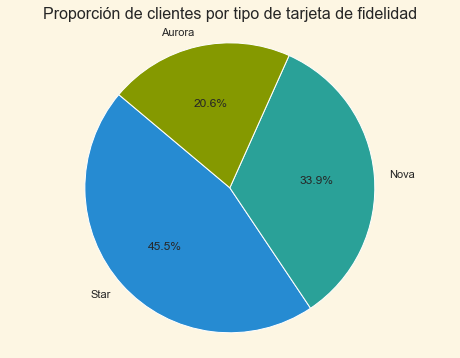

In [140]:
loyalty = df['loyaltycard'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(loyalty, 
        labels = loyalty.index, 
        autopct = '%1.1f%%', 
        startangle = 140)
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.axis('equal');


Se usa el método matbplotlib, se ha usado el tipo de gráfico pie, se basa en la columna 'loyaltcard', pero antes sacamos los valores con una variable. Las etiquetas labels se coge la variable anterior, de sus índices, autopct agrega los porcentajes, startangle controla el angulo donde comienza el primer sector.

El grafico de quesitos nos muestra, que la mayoria de clientes son Star, seguido de Nova, y finaliza en Aurora

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

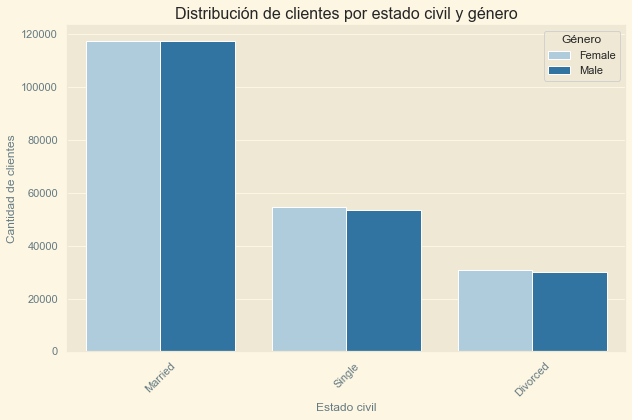

In [141]:

plt.figure(figsize = (10, 6))
sns.countplot(x = 'maritalstatus',
               hue = 'gender', 
               data = df, 
               palette = 'Paired')
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation = 45)
plt.legend(title = 'Género');


Del método seaborn, se ha usado un countplot, para variable catégoricas, que es este caso e 'maritalstatus' el estado civil de los clientes, agregamos hue para garegar otra variable categoria, en este caso 'gender' y la paleta Paired. Con tamaño 10x6 y los xticks a 45 grados

La mayoria de los clientes, estan casado, y los que menos están divorciados. Y se puede ver que, como los clientes casado tiene el mismo nivel entre mujeres y hombres. En cambio, en soltero y divorciado no, además hay más hombres que mujeres en la poblacion de clientes de la empresa.

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

1. Preparación de Datos:

Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [142]:
columnas = ['flightsbooked', 'education'] #Nombre de las columnas que queremos filtrar
df_ev = df.loc[:,columnas]  #Selecciona todas las filas (:) y las columnas especificadas en la lista columnas
df_ev #Crea un df nuevo

,flightsbooked,education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor
...,...,...
403755,0,Bachelor
403756,0,Bachelor
403757,0,Bachelor
403758,0,Bachelor


2. Análisis Descriptivo:

Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [143]:
educacion = df_ev.groupby('education')['flightsbooked'].describe()
educacion 

#Se agrupa con groupby la columna educación y sus atributos dependiendo de los vuelos reservados
#Se usa describe para ver la estadística


,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Como sabemos la columna 'education' tiene mas de dos grupos y se quiere saber si hay una diferencia general entre ellos, por ello se usará el análisis de varianza (ANOVA), pero antes de ello primero hay que hacer un test de Shapiro-wilk para ver si siguen una distribucion normal, el siguiente paso en hacer una prueba de levene para verificar si las varianzas son homogéneas entre grupos, finalmente ANOVA.

In [144]:
niveles_educativos = df['education'].unique()#Se obtiene los valores unicos niveles educativos

for nivel in niveles_educativos:
    datos_nivel = df[df['education'] == nivel]['flightsbooked']
    #Se filtra los datos segun el nivel y se recogen los vuelos reservados
    # Se realiza la prueba de Shapiro-Wilk para cada nivel educativo
    statistics, p_value = stats.shapiro(datos_nivel)
    
    #Resultados por cada nivel educativo
    print(f"Resultados para el nivel educativo '{nivel}':")
    print("Estadística de Shapiro-Wilk:", statistics)
    print("Valor p:", p_value)
    
    if p_value > 0.05:  # Si pvalue es menor a 0.05, los datos no son normales
        print("Los datos siguen una distribución normal.")
    else:
        print("Los datos no siguen una distribución normal.")
    print("\n")



Resultados para el nivel educativo 'Bachelor':
Estadística de Shapiro-Wilk: 0.7869439721107483
Valor p: 0.0
Los datos no siguen una distribución normal.


Resultados para el nivel educativo 'College':
Estadística de Shapiro-Wilk: 0.7910076975822449
Valor p: 0.0
Los datos no siguen una distribución normal.


Resultados para el nivel educativo 'Master':
Estadística de Shapiro-Wilk: 0.796739399433136
Valor p: 0.0
Los datos no siguen una distribución normal.


Resultados para el nivel educativo 'High School or Below':
Estadística de Shapiro-Wilk: 0.7922018766403198
Valor p: 0.0
Los datos no siguen una distribución normal.


Resultados para el nivel educativo 'Doctor':
Estadística de Shapiro-Wilk: 0.7911021709442139
Valor p: 0.0
Los datos no siguen una distribución normal.




In [145]:

bachelor_data = df[df['education'] == 'Bachelor']['flightsbooked']
college_data = df[df['education'] == 'College']['flightsbooked']
doctor_data = df[df['education'] == 'Doctor']['flightsbooked']
high_school_data = df[df['education'] == 'High School or Below']['flightsbooked']
master_data = df[df['education'] == 'Master']['flightsbooked']

# Prueba de Levene
statistic, p_value = stats.levene(bachelor_data, college_data, doctor_data, high_school_data, master_data)

print("Estadística de Levene:", statistic)
print("Valor p:", p_value)

if p_value > 0.05:
    print("Las varianzas son homogéneas entre grupos.")
else:
    print("Las varianzas no son homogéneas entre grupos.")


Estadística de Levene: 3.0859845824023715
Valor p: 0.014969793534581529
Las varianzas no son homogéneas entre grupos.


In [146]:
niveles_educativos = df['education'].unique() #Se obtienen los valores únicos de niveles educativos

#Lista para almacenar los datos de vuelos reservados por nivel educativo
datos_por_nivel = []

for nivel in niveles_educativos:  #Se itera con bucle for por los niveles
    datos_nivel = df[df['education'] == nivel]['flightsbooked']
    datos_por_nivel.append(datos_nivel) # Se agregan los datos a la lista

#prueba de Levene
statistic, p_value = stats.levene(*datos_por_nivel)

print("Estadística de Levene:", statistic)
print("Valor p:", p_value)

if p_value > 0.05:
    print("Las varianzas son homogéneas entre grupos.")
else:
    print("Las varianzas no son homogéneas entre grupos.")


Estadística de Levene: 3.0859845824023715
Valor p: 0.014969793534581529
Las varianzas no son homogéneas entre grupos.


In [147]:
niveles_educativos = df['education'].unique()  #Se obtienen los valores únicos de niveles educativos

#Lista para almacenar los datos de vuelos reservados por nivel educativo
datos_por_nivel = []

for nivel in niveles_educativos: #Se itera con bucle for por los niveles
    datos_nivel = df[df['education'] == nivel]['flightsbooked']
    datos_por_nivel.append(datos_nivel)  # Se agregan los datos a la lista

# Se realiza el test ANOVA con los datos de vuelos reservados por nivel educativo
statistic, p_value = f_oneway(*datos_por_nivel)

print("Estadístico F:", statistic)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Hay diferencias significativas en el número de vuelos reservados entre al menos dos grupos.")
   
else:
    print("No hay evidencia de diferencias significativas en el número de vuelos reservados entre los grupos.")


Estadístico F: 3.578957738498352
Valor p: 0.00635298173601954
Hay diferencias significativas en el número de vuelos reservados entre al menos dos grupos.


- Test de Shapiro-Wilk: Indica que los datos de vuelos reservados para cada nivel educativo no siguen una distribución normal. Esto significa que la distribución de los datos de vuelos reservados para cada grupo educativo no se ajusta a una distribución normal.

- Prueba de Levene: Muestra que las varianzas entre los grupos de diferentes niveles educativos no son homogéneas. Esto indica que las diferencias en las varianzas de los vuelos reservados entre los niveles educativos son significativas.

- Prueba de ANOVA: Revela que existen diferencias significativas en el número de vuelos reservados entre al menos dos grupos de niveles educativos.

Al combinar estas interpretaciones con los resultados específicos de educación y vuelos reservados, se puede concluir que, hay diferencias significativas en los vuelos reservados entre al menos dos grupos educativos. Se puede apreciar que hay una diferencia significativa entre los distintos niveles de educacion y los vuelos reservados, a cuanto más nivel educativo, más vuelos reservados. Se necesita explorar otras técnicas estadísticas.